<a href="https://colab.research.google.com/github/flaakira/titanic/blob/master/Copy_of_EDA_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando e tratando base de dados

In [0]:
import pandas as pd


In [0]:
dados = pd.read_csv('tips_atualizado.csv')

In [0]:
dados.tail()

,total_bill,tip,dessert,day,time,size
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2
3415,18.079740,2.812176,No,Thur,Dinner,2


Traducao

In [0]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [0]:
renomear = {'total_bill' : 'valor_total_da_conta', 
            'tip' : 'gorjeta', 
            'dessert': 'sobremesa', 
            'day': 'dia_da_semana', 
            'time' : 'hora_do_dia', 
            'size': 'total_de_pessoas' }

In [0]:
gorjeta = dados.rename(columns = renomear)

In [0]:
gorjeta.head()

,valor_total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [0]:
gorjeta.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [0]:
sim_nao = {'Yes' : 'sim','No' : 'nao'}

In [0]:
sim_nao

{'No': 'nao', 'Yes': 'sim'}

In [0]:
gorjeta.sobremesa = gorjeta.sobremesa.map(sim_nao)

In [0]:
gorjeta.head(5)

,valor_total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,nao,Sun,Dinner,2
1,10.34,1.66,nao,Sun,Dinner,3
2,21.01,3.50,nao,Sun,Dinner,3
3,23.68,3.31,nao,Sun,Dinner,2
4,24.59,3.61,nao,Sun,Dinner,4


In [0]:
gorjeta.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [0]:
dias = {'Sun' : 'Domingo', 
        'Sat' : 'Sabado', 
        'Thur' : 'Quinta', 
        'Fri' : 'Sexta'}

In [0]:
gorjeta.dia_da_semana = gorjeta.dia_da_semana.map(dias)

In [0]:
gorjeta.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [0]:
hora = {'Dinner' : 'Jantar', 
        'Lunch': 'Almoco'}

In [0]:
gorjeta.hora_do_dia = gorjeta.hora_do_dia.map(hora)

In [0]:
gorjeta.tail()

,valor_total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
3411,26.330845,4.729032,nao,Sabado,Jantar,3
3412,25.531567,1.604021,sim,Sabado,Jantar,2
3413,21.547132,1.733914,sim,Sabado,Jantar,2
3414,18.966233,1.718951,nao,Sabado,Jantar,2
3415,18.079740,2.812176,nao,Quinta,Jantar,2


Importando o Seaborn

In [0]:
import seaborn as sns

In [0]:
!pip show seaborn

Name: seaborn
Version: 0.10.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, matplotlib, pandas, numpy
Required-by: missingno


# Analise 1 - Valor da conta e gorjeta

In [0]:
gorjeta.columns

Index(['valor_total_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

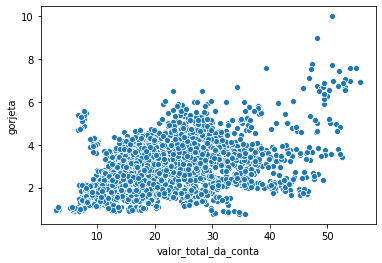

In [0]:
sns.scatterplot(x='valor_total_da_conta', y = 'gorjeta', data=gorjeta)

**Visualmente, o valor da gorjeta aumenta conforme o aumento do valor da conta**

In [0]:
print ('A base de dados contem {} registros\n'.format(gorjeta.shape[0]))

A base de dados contem 3416 registros



Criando o campo porcentagem 

In [0]:
gorjeta.head(1)

,valor_total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,nao,Domingo,Jantar,2


In [0]:
gorjeta = pd.DataFrame(gorjeta)

In [0]:
gorjeta['porcentagem'] = gorjeta['gorjeta'] / gorjeta['valor_total_da_conta']

In [0]:
gorjeta.head(5)

,valor_total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,nao,Domingo,Jantar,2,0.059447
1,10.34,1.66,nao,Domingo,Jantar,3,0.160542
2,21.01,3.50,nao,Domingo,Jantar,3,0.166587
3,23.68,3.31,nao,Domingo,Jantar,2,0.139780
4,24.59,3.61,nao,Domingo,Jantar,4,0.146808


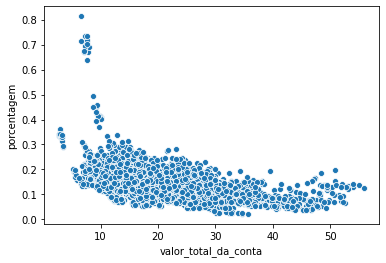

In [0]:
porcentagem_conta = sns.scatterplot(x='valor_total_da_conta', y = 'porcentagem', data=gorjeta)

**Visualmente quanto maior o valor da compra menor o valor proporcional da gorjeta**

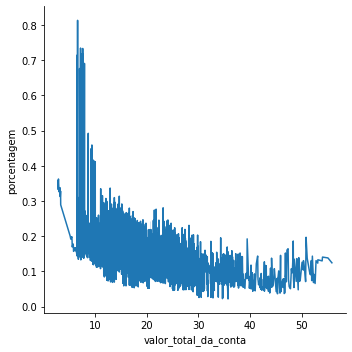

In [0]:
porcetagem_conta_tinha = sns.relplot(x='valor_total_da_conta', y = 'porcentagem',kind = 'line', data=gorjeta)

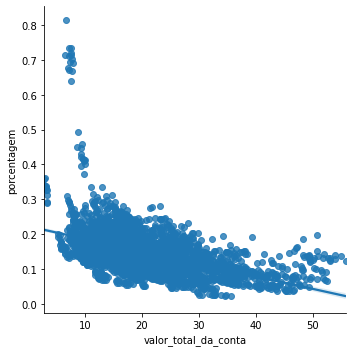

In [0]:
sns.lmplot(x='valor_total_da_conta', y = 'porcentagem', data=gorjeta)

# Analise 2 - Sobremesa

In [0]:
gorjeta.head()

,valor_total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,nao,Domingo,Jantar,2,0.059447
1,10.34,1.66,nao,Domingo,Jantar,3,0.160542
2,21.01,3.50,nao,Domingo,Jantar,3,0.166587
3,23.68,3.31,nao,Domingo,Jantar,2,0.139780
4,24.59,3.61,nao,Domingo,Jantar,4,0.146808


In [0]:
gorjeta[gorjeta.sobremesa=='sim'].describe()

,valor_total_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153495
std,9.901358,1.162280,0.806690,0.089080
min,2.799644,0.766203,1.000000,0.021449
25%,13.495501,1.911661,2.000000,0.092670
50%,17.917059,2.434354,2.000000,0.146878
75%,26.807493,3.326298,3.000000,0.189035
max,55.804318,10.000000,5.000000,0.813498


In [0]:
gorjeta[gorjeta.sobremesa=='nao'].describe()

,valor_total_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150043
std,8.316030,1.024271,1.014848,0.044202
min,6.533329,0.910509,1.000000,0.041987
25%,13.281977,1.931135,2.000000,0.120642
50%,17.736923,2.608222,2.000000,0.145750
75%,22.749482,3.284578,3.000000,0.177951
max,53.091371,9.000000,6.000000,0.334780


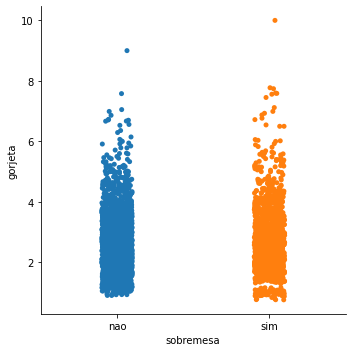

In [0]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data= gorjeta)

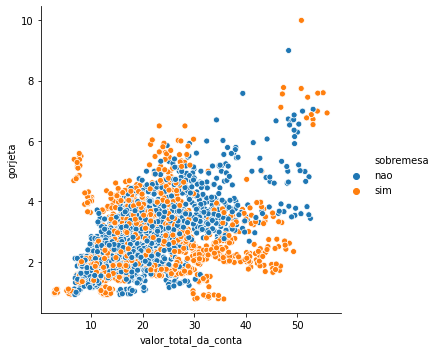

In [0]:
sns.relplot(x = 'valor_total_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjeta)

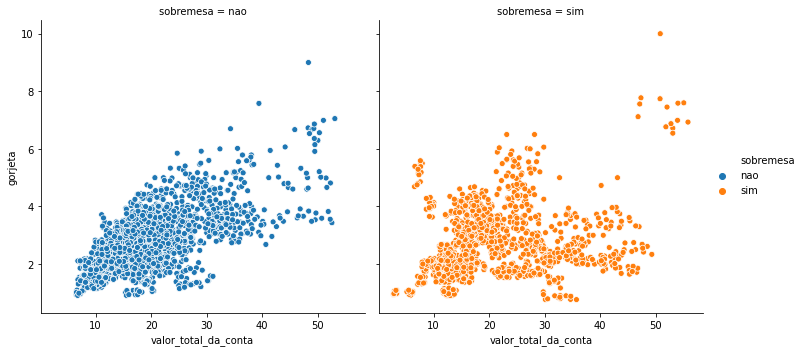

In [0]:
sns.relplot(x = 'valor_total_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjeta)

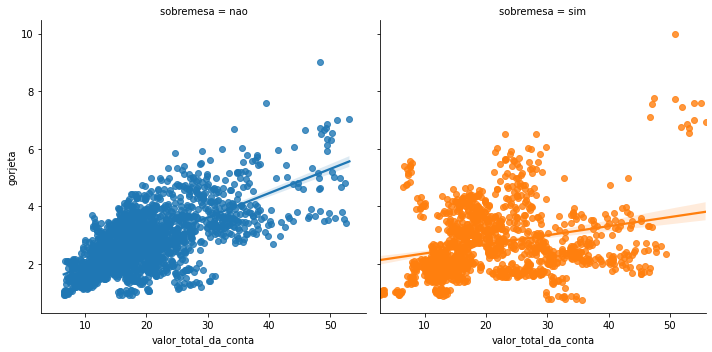

In [0]:
sns.lmplot(x = 'valor_total_da_conta', y ='gorjeta', col = 'sobremesa', hue = 'sobremesa', data = gorjeta)

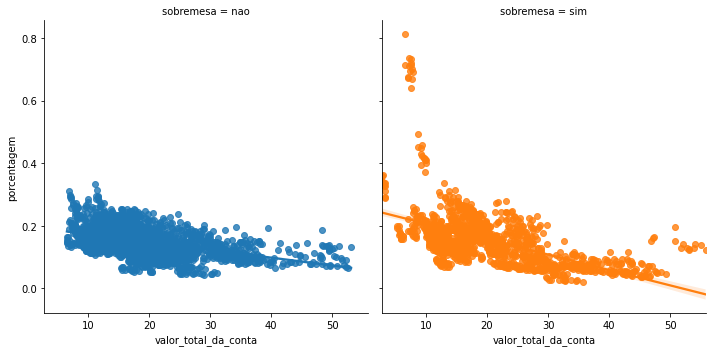

In [0]:
sns.lmplot(x = 'valor_total_da_conta', y ='porcentagem', col = 'sobremesa', hue = 'sobremesa', data = gorjeta)

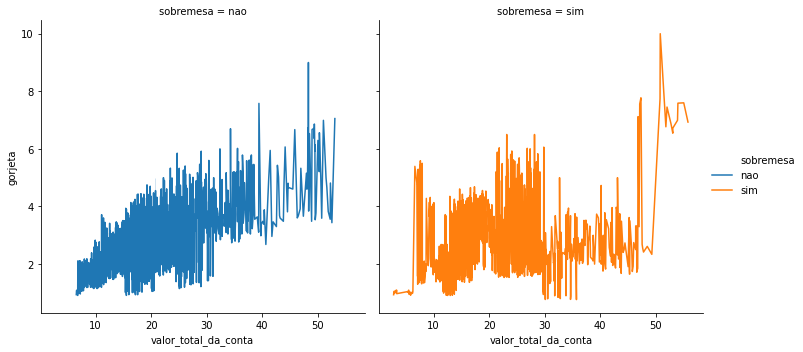

In [0]:
sns.relplot(x = 'valor_total_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa',kind = 'line', data = gorjeta)

**Visualmente, existe uma diferenca no valor da gorjeta daqueles que pediram sobremesa e nao pediram sobremesa**

Teste de Hipotese

**H<sup>null</sup>**

>**A distribuicao da taxa e a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuicao da taxa e nao a mesma nos dois grupos**

In [0]:
from scipy.stats import ranksums

In [0]:
sobremesa = gorjeta.query("sobremesa == 'sim'").porcentagem

In [0]:
sem_sobremesa = gorjeta.query("sobremesa == 'nao'").porcentagem

In [0]:
r = ranksums(sobremesa, sem_sobremesa)

In [0]:
print('O valor do p-value e {}'.format(r.pvalue))

O valor do p-value e 0.036051425250648333


**H<sup>alt<sup/>**

**A distribuicao da taxa e nao a mesma nos dois grupos**

# Analise 3 = dia da semana

In [0]:
gorjeta.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

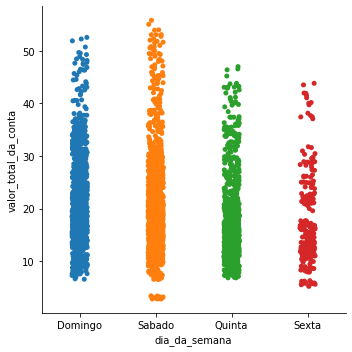

In [0]:
sns.catplot(x='dia_da_semana', y = 'valor_total_da_conta', data=gorjeta)

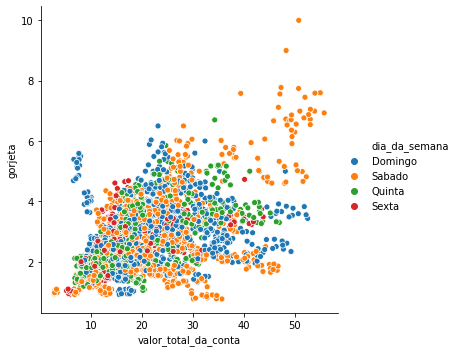

In [0]:
sns.relplot(x = 'valor_total_da_conta', hue = 'dia_da_semana', y = 'gorjeta', data=gorjeta)

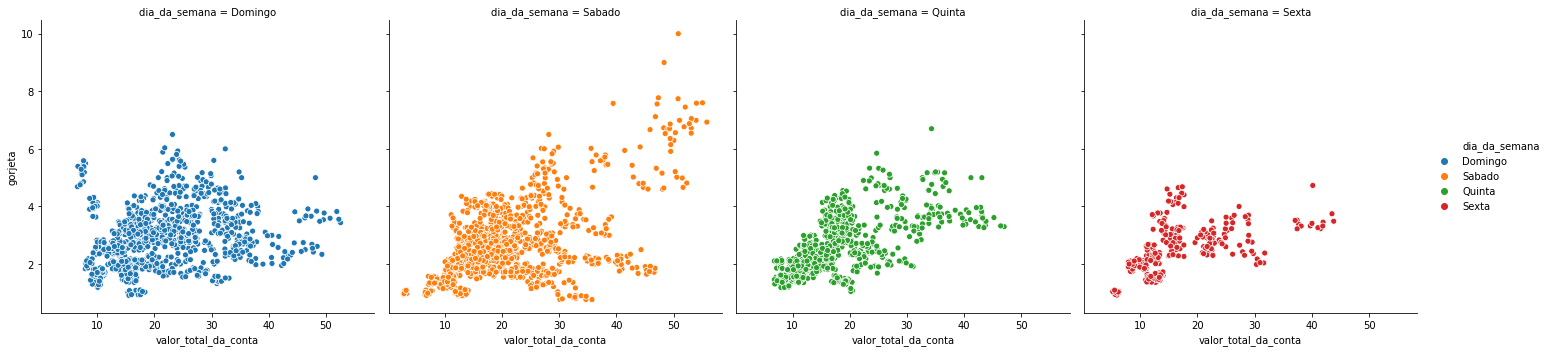

In [0]:
sns.relplot(x = 'valor_total_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjeta)

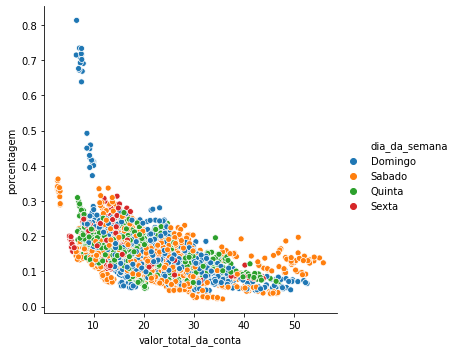

In [0]:
sns.relplot(x = 'valor_total_da_conta', hue = 'dia_da_semana', y = 'porcentagem', data=gorjeta)

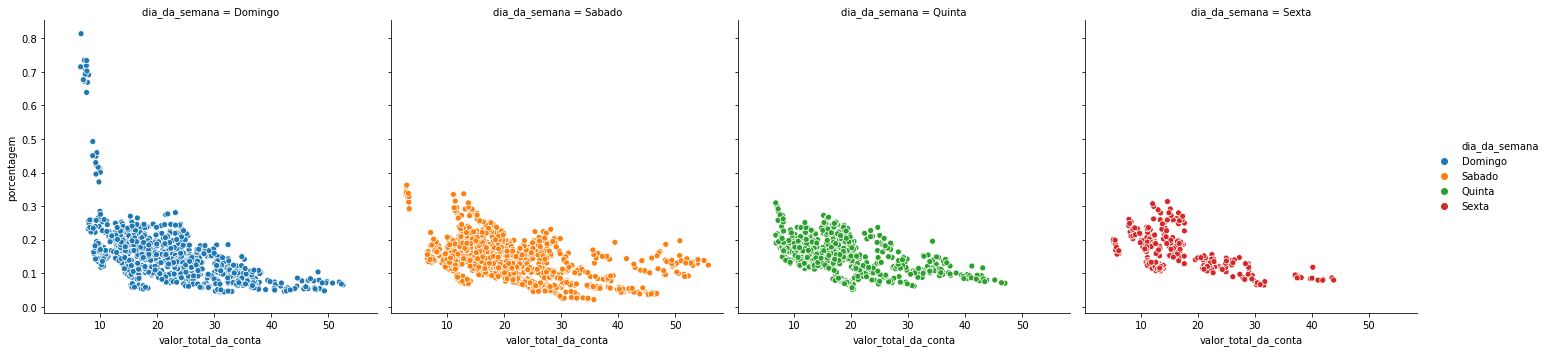

In [0]:
sns.relplot(x = 'valor_total_da_conta', hue = 'dia_da_semana', y = 'porcentagem',col = 'dia_da_semana', data=gorjeta)

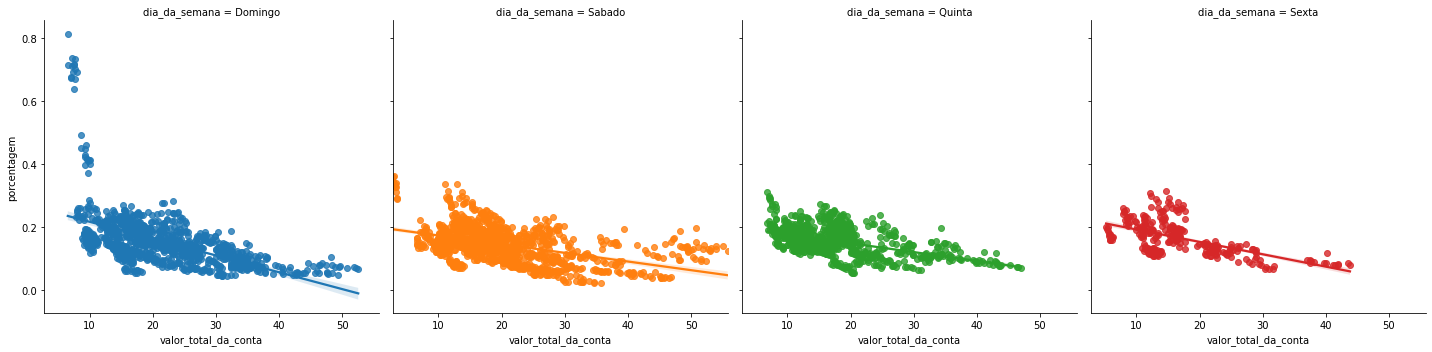

In [0]:
sns.lmplot(x = 'valor_total_da_conta', hue = 'dia_da_semana', y = 'porcentagem',col = 'dia_da_semana', data=gorjeta)

In [0]:
media_geral_gorjetas = gorjeta.gorjeta.mean()

In [0]:
print('A Media geral das gorjetas e de {}'.format(media_geral_gorjetas))

A Media geral das gorjetas e de 2.7111892140916103


In [0]:
gorjeta.groupby(['dia_da_semana']).mean()[['valor_total_da_conta', 'gorjeta', 'porcentagem']]

,valor_total_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154985
Quinta,17.724088,2.556177,0.154215
Sabado,20.480249,2.690114,0.143576
Sexta,17.215616,2.549960,0.163171


In [0]:
gorjeta.dia_da_semana.value_counts()

Sabado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

**Teste de Hipotese**

**H <sup>null</sup>**

A distribuicao do  valor da conta e igual no sabado e no domingo

**H <sup>alt</sup>**

A distribuicao do  valor da conta nao e igual no sabado e no domingo

In [0]:
valor_conta_domingo = gorjeta.query("dia_da_semana =='Domingo'").valor_total_da_conta

In [0]:
valor_conta_sabado = gorjeta.query("dia_da_semana =='Sabado'").valor_total_da_conta

In [0]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value e {}'.format(r2.pvalue))

O valor do p-value e 0.0004435935681441821


**H <sup>alt</sup>**

A distribuicao do  valor da conta nao e igual no sabado e no domingo

# Analise 4 - Hora do dia

In [0]:
gorjeta.head()

,valor_total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,nao,Domingo,Jantar,2,0.059447
1,10.34,1.66,nao,Domingo,Jantar,3,0.160542
2,21.01,3.50,nao,Domingo,Jantar,3,0.166587
3,23.68,3.31,nao,Domingo,Jantar,2,0.139780
4,24.59,3.61,nao,Domingo,Jantar,4,0.146808


In [0]:
gorjeta.hora_do_dia.unique()

array(['Jantar', 'Almoco'], dtype=object)

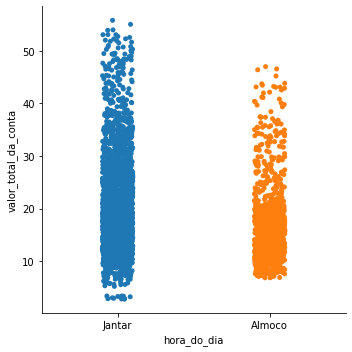

In [0]:
sns.catplot(x = 'hora_do_dia', y = 'valor_total_da_conta', data=gorjeta)

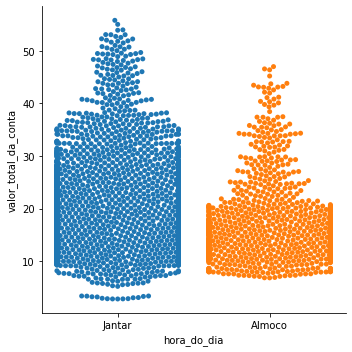

In [0]:
sns.catplot(x = 'hora_do_dia', y = 'valor_total_da_conta', kind='swarm', data=gorjeta)

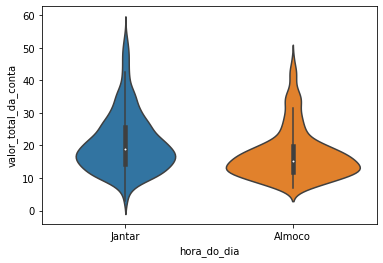

In [0]:
sns.violinplot(x = 'hora_do_dia', y = 'valor_total_da_conta', data=gorjeta)

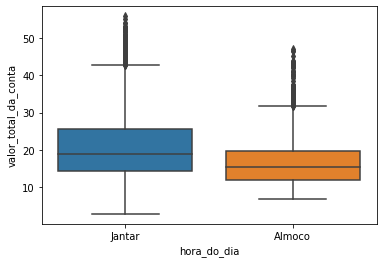

In [0]:
sns.boxplot(x= 'hora_do_dia', y = 'valor_total_da_conta', data=gorjeta)

In [0]:
almoco = gorjeta.query("hora_do_dia == 'Almoco'").valor_total_da_conta

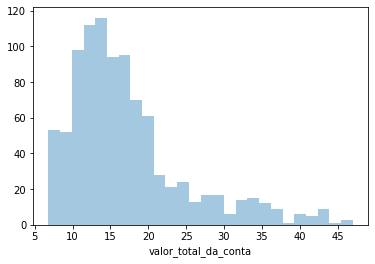

In [0]:
sns.distplot(almoco,kde = False)

In [0]:
jantar = gorjeta.query("hora_do_dia == 'Jantar'").valor_total_da_conta

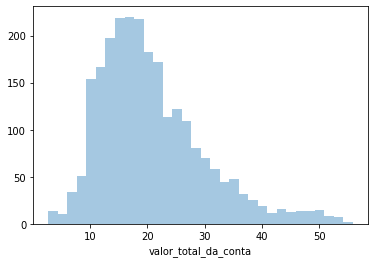

In [0]:
sns.distplot(jantar,kde=False)

In [0]:
gorjeta.groupby(['hora_do_dia']).mean()[['valor_total_da_conta', 'gorjeta', 'porcentagem']]

,valor_total_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoco,17.213913,2.534495,0.157784
Jantar,20.832954,2.779458,0.148876


**Teste de Hipotese**

**H <sup>null</sup>**

A distribuicao do valor da conta e igual no jantar e no almoco

**H <sup>alt</sup>**

A distribuicao do valor da conta e igual no jantar e no almoco

In [0]:
r2 = ranksums(jantar, almoco)
print('O valor do p-value e de {}'.format(r2.pvalue))

O valor do p-value e de 5.169201062207143e-34


H alt

A distribuicao do valor da conta e igual no jantar e no almoco

**Teste de hipotese 2**

In [0]:
porcentagem_almoco = gorjeta.query("hora_do_dia =='Almoco'").porcentagem

In [0]:
porcentagem_jantar = gorjeta.query("hora_do_dia =='Jantar'").porcentagem

In [0]:
r2 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value e de {}'.format(r2.pvalue))

O valor do p-value e de 9.480580720296862e-12


**H <sup>null</sup>**

A distribuicao do valor da conta e igual no jantar e no almoco

